In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [7]:
df=pd.read_csv('data/TrainAndValid.csv',low_memory=False)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 1

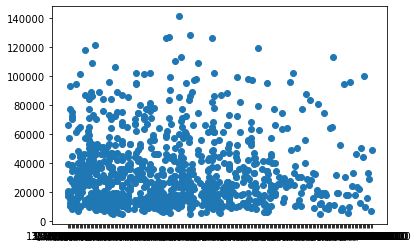

In [11]:
fig,ax=plt.subplots()
ax.scatter(df['saledate'][:1000],df['SalePrice'][:1000])

<AxesSubplot:ylabel='Frequency'>

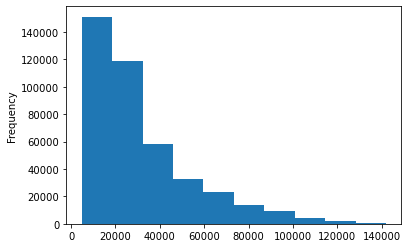

In [12]:
df.SalePrice.plot.hist()

In [15]:
df=pd.read_csv('data/TrainAndValid.csv',
              low_memory=False,
              parse_dates=['saledate'])

In [16]:
df.saledate

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
412693   2012-03-07
412694   2012-01-28
412695   2012-01-28
412696   2012-03-07
412697   2012-01-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

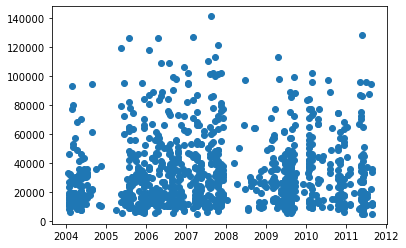

In [17]:
fig,ax=plt.subplots()
ax.scatter(df['saledate'][:1000],df['SalePrice'][:1000])

In [18]:
df.sort_values(by=['saledate'],inplace=True,ascending=True)

In [19]:
df.saledate

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
            ...    
410879   2012-04-28
412476   2012-04-28
411927   2012-04-28
407124   2012-04-28
409203   2012-04-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

In [49]:
df_t=df.copy()

In [50]:
df_t['saleyear']=df_t.saledate.dt.year
df_t['salemonth']=df_t.saledate.dt.month
df_t['saleday']=df_t.saledate.dt.day
df_t['saledayofweek']=df_t.saledate.dt.dayofweek
df_t['saledayofyear']=df_t.saledate.dt.dayofyear 

In [51]:
df_t.drop('saledate',axis=1,inplace=True)

In [52]:
from sklearn.ensemle import RandomForestRegressor
model=RandomForestRegressor(n_jobs=-1,
                           random_state=42)
model.fit(df_t.drop('SalePrice',axis=1,df_t['SalePrice']))

SyntaxError: positional argument follows keyword argument (1463117765.py, line 4)

In [53]:
pd.api.types.is_string_dtype(df_t['UsageBand'])

True

In [54]:
for label,col in df_t.items():
    if pd.api.types.is_string_dtype(col):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [55]:
for label,content in df_t.items():
    if pd.api.types.is_string_dtype(col):
        df_t[label]=content.astype('category').cat.as_ordered()

In [57]:
for label,content in df_t.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleyear
salemonth
saleday
saledayofweek
saledayofyear


In [59]:
for label,content in df_t.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_t[label+'_is_missing']=pd.isnull(content)
            df_t[label]=content.fillna(content.median())

In [65]:
for label,content in df_t.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_t[label+'_is_missing']=pd.isnull(content)
        df_t[label]=pd.Categorical(content).codes + 1
        

In [69]:
df_t.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [72]:
%%time
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_jobs=-1,
                           random_state=42)
model.fit(df_t.drop('SalePrice',axis=1),df_t['SalePrice'])

CPU times: total: 32min 38s
Wall time: 10min 32s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [73]:
model.score(df_t.drop('SalePrice',axis=1),df_t['SalePrice'])

0.9875468079970562

In [77]:
df_val=df_t[df_t.saleyear==2012]
df_train=df_t[df_t.saleyear!=2012]

In [79]:
x_train,y_train=df_train.drop('SalePrice',axis=1),df_train.SalePrice
x_valid,y_valid=df_val.drop('SalePrice',axis=1),df_val.SalePrice

In [92]:
from sklearn.metrics import mean_squared_log_error,mean_absolute_error,r2_score
def rmsle(y_true,y_preds):
    return np.sqrt(mean_squared_log_error(y_true,y_preds))

def show_scores(model):
    train_preds=model.predict(x_train)
    val_preds=model.predict(x_valid)
    scores={'train mae':mean_absolute_error(y_train,train_preds),
          "valid mae": mean_absolute_error(y_valid,val_preds),
          'traing rmsle':rmsle(y_train,train_preds),
          'validrmsle':rmsle(y_valid,val_preds),
          'traing r2': r2_score(y_train,train_preds),
          'valid r2':r2_score(y_valid,val_preds)}
    return scores
                   
    

In [84]:
model=RandomForestRegressor(n_jobs=-1,
                           random_state=42,
                           max_samples=10000)

In [85]:
%%time
model.fit(x_train,y_train)

CPU times: total: 1min 4s
Wall time: 23.8 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [93]:
show_scores(model)

{'train mae': 5561.2988092240585,
 'valid mae': 7177.26365505919,
 'traing rmsle': 0.257745378256977,
 'validrmsle': 0.29362638671089003,
 'traing r2': 0.8606658995199189,
 'valid r2': 0.8320374995090507}

In [100]:
%%time
from sklearn.model_selection import RandomizedSearchCV

rf_grid={'n_estimators':np.arange(10,100,10),
        'max_depth':[None,3,5,10],
        'min_samples_split':np.arange(2,10,2),
        'min_samples_leaf':np.arange(1,10,2),
        'max_features':[0.5,1,'sqrt','auto']}
rs_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                random_state=42),
                           param_distributions=rf_grid,
                           n_iter=40,
                           cv=5,
                           verbose=True)
rs_model.fit(x_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


C:\Users\Ankit\Desktop\buldozer-project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Ankit\Desktop\buldozer-project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Ankit\Desktop\buldozer-project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this pa

C:\Users\Ankit\Desktop\buldozer-project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Ankit\Desktop\buldozer-project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Ankit\Desktop\buldozer-project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this pa

C:\Users\Ankit\Desktop\buldozer-project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Ankit\Desktop\buldozer-project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Ankit\Desktop\buldozer-project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this pa

CPU times: total: 20min 5s
Wall time: 2h 42min 52s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=40,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([1, 3, 5, 7, 9]),
                                        'min_samples_split': array([2, 4, 6, 8]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [101]:
rs_model.best_params_

{'n_estimators': 90,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_features': 0.5,
 'max_depth': None}

In [103]:
show_scores(rs_model)

{'train mae': 2508.6070503538917,
 'valid mae': 5918.816851629348,
 'traing rmsle': 0.1279967957209226,
 'validrmsle': 0.24383370861273113,
 'traing r2': 0.9679891924760106,
 'valid r2': 0.8818682585869947}

In [214]:
%%time
from sklearn.model_selection import RandomizedSearchCV

rs_model=RandomForestRegressor(n_jobs=-1,
                            random_state=42,
                            n_estimators=90,
                            min_samples_split=6,
                            min_samples_leaf=3,
                            max_features=0.5)
rs_model.fit(x_train,y_train)

CPU times: total: 12min 51s
Wall time: 4min 47s


RandomForestRegressor(max_features=0.5, min_samples_leaf=3, min_samples_split=6,
                      n_estimators=90, n_jobs=-1, random_state=42)

In [215]:
show_scores(rs_model)

{'train mae': 2508.6070503538926,
 'valid mae': 5918.816851629348,
 'traing rmsle': 0.1279967957209226,
 'validrmsle': 0.24383370861273113,
 'traing r2': 0.9679891924760106,
 'valid r2': 0.8818682585869947}

In [154]:
def preprosesing(df):
    df['saleyear']=df.saledate.dt.year
    df['salemonth']=df.saledate.dt.month
    df['saleday']=df.saledate.dt.day
    df['saledayofweek']=df.saledate.dt.dayofweek
    df['saledayofyear']=df.saledate.dt.dayofyear 

    df.drop('saledate',axis=1,inplace=True)

    for label,content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+'_is_missing']=pd.isnull(content)
                df[label]=content.fillna(content.median())
            

        if not pd.api.types.is_numeric_dtype(content):
            df[label+'_is_missing']=pd.isnull(content)
            df[label]=pd.Categorical(content).codes + 1
    return df

In [155]:
df_test=pd.read_csv('data/Test.csv',
                   low_memory=False,
                   parse_dates=['saledate'])

In [156]:
df_test=preprosesing(df_test)
df_test

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,3525.0,0,713,235,...,False,False,False,False,False,True,True,True,True,True
12453,6643173,2558332,21434,149,2,2005,3525.0,0,186,80,...,False,False,False,False,False,True,True,True,True,True
12454,6643184,2558342,21437,149,2,1000,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True
12455,6643186,2558343,21437,149,2,2006,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True


In [157]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [207]:
test_preds=rs_model.predict(df_test)

C:\Users\Ankit\Desktop\buldozer-project\env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [159]:
x_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
274835,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
141296,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
212552,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
62755,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


In [160]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [161]:
set(x_train.columns)-set(df_test.columns)

{'auctioneerID_is_missing'}

In [162]:
df_test['auctioneerID_is_missing']=False

In [163]:
test_preds=rs_model.predict(df_test)

C:\Users\Ankit\Desktop\buldozer-project\env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [164]:
test_preds

array([19771.33377425, 20527.65520282, 52159.50295075, ...,
       14242.07210999, 20079.27152477, 29726.16343533])

In [166]:
df_preds=pd.DataFrame()
df_preds['SalesID']=df_test['SalesID']
df_preds['SalesPrice']=test_preds

In [176]:
df_preds

,SalesID,SalesPrice
0,1227829,19771.333774
1,1227844,20527.655203
2,1227847,52159.502951
3,1227848,62388.225309
4,1227863,40269.798890
...,...,...
12452,6643171,48346.093474
12453,6643173,15592.234347
12454,6643184,14242.072110
12455,6643186,20079.271525


In [179]:
rs_model.feature_importances_

array([3.59996135e-02, 1.95019065e-02, 3.77509931e-02, 1.85925378e-03,
       3.78739019e-03, 2.04566444e-01, 3.22953610e-03, 1.14037182e-03,
       4.68292112e-02, 4.05278253e-02, 6.48597369e-02, 4.03123744e-03,
       1.56704637e-02, 1.52006621e-01, 4.52914612e-02, 7.13248575e-03,
       2.69290453e-03, 2.27251094e-03, 3.37486874e-03, 6.28148774e-02,
       4.47704553e-04, 5.89175838e-05, 1.08279119e-03, 2.81959866e-04,
       1.23264874e-03, 2.62606361e-05, 1.35380136e-03, 8.54956725e-03,
       1.42062772e-03, 2.76723161e-03, 3.44550917e-03, 2.83100064e-03,
       4.13578824e-03, 1.60518136e-03, 5.31906182e-04, 5.66975192e-03,
       8.69515807e-04, 1.34865392e-02, 3.13589434e-04, 3.49274489e-03,
       1.08866724e-03, 1.09787591e-03, 2.62217963e-03, 6.82541719e-04,
       5.32620470e-04, 3.75712642e-04, 2.36603975e-04, 1.71613844e-03,
       1.12813819e-03, 1.72143561e-04, 4.35570879e-04, 7.31791371e-02,
       4.92610119e-03, 7.25826447e-03, 3.66605548e-03, 1.13000721e-02,
      

In [205]:
def plot_features(columns,importance,n=21):
    df=(pd.DataFrame({'features':columns,
                     'features_importance':importance})
       .sort_values('features_importance',ascending=False)
       .reset_index(drop=True))
    fig,ax=plt.subplots()
    ax.barh(df['features'][:n],df['features_importance'][:n])
    ax.set_xlabel('features')
    ax.set_ylabel('features importancs')
    ax.invert_yaxis()
    

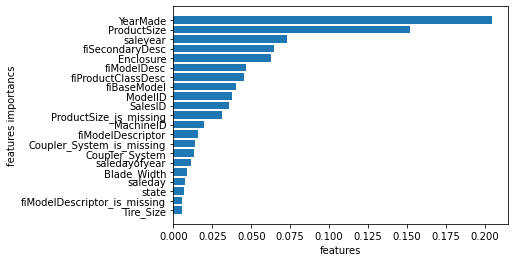

In [206]:
 plot_features(x_train.columns,rs_model.feature_importances_)